## Data Exploration

### 1. Open Canada

Fuel Consumption ratings of cars

Main link: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

In [2]:
import pandas as pd
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re
from pathlib import Path
import json

In [3]:
url = "https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64"
uClient = uReq(url)
page_html = uClient.read()
uClient.close()

In [4]:
page_soup = soup(page_html, "html.parser")

In [5]:
# Access all links and names
csv_links = page_soup.findAll("span", {"property":"url"})
table_name = page_soup.findAll("span",{"property":"name","lang":'en'})

# Parse as comprehension lists
csv_list = [csv_links[i].text for i in range(len(csv_links))]
names_list = [table_name[i].text.split("(")[0] for i in range(len(table_name))]
dates_list = [table_name[i].text.split("(")[1].replace(")","")  if len(table_name[i].text.split("("))>1 else "" for i in range(len(table_name))]

# Build dataframe
data_df = pd.DataFrame({"Table Name":names_list,"Table Date":dates_list, "Table Url": csv_list})

# There are duplications of the datasets - one link in English, one in French
data_df.drop_duplicates(subset=['Table Name'], inplace=True)

# Clean up
data_df['Table Name'] = data_df['Table Name'].str.rstrip()

In [6]:
data_df.head(10)

,Table Name,Table Date,Table Url
0,Battery-electric vehicles 2012-2022,2022-05-16,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
2,Plug-in hybrid electric vehicles 2012-2022,2022-03-28,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
4,2022 Fuel Consumption Ratings,2022-08-18,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
6,2021 Fuel Consumption Ratings,2022-08-09,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
8,2020 Fuel Consumption Ratings,2021-09-29,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
10,2019 Fuel Consumption Ratings,2021-09-29,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
12,2018 Fuel Consumption Ratings,2021-09-29,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
14,2017 Fuel Consumption Ratings,2020-03-17,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
16,2016 Fuel Consumption Ratings,2020-03-17,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...
18,2015 Fuel Consumption Ratings,2020-03-17,https://www.nrcan.gc.ca/sites/nrcan/files/oee/...


### Exploring 2022 Fuel Consumption Ratings

In [7]:
year = "2022"
name = f"{year} Fuel Consumption Ratings"
fuel_consumption_2022 = data_df[data_df['Table Name']==name]['Table Url'].values[0]

In [8]:
# Save file
folder = "C:/Users/Laura GF/Documents/GitHub/machine-learning-capstone/data"
csv_req = requests.get(fuel_consumption_2022)
url_content = csv_req.content
file_name = f'{name.replace(" ","_")}.csv'
csv_file = open(Path(folder,file_name), 'wb',)

csv_file.write(url_content)
csv_file.close()

In [9]:
sample_df = pd.read_csv(Path(folder,file_name), sep=",", low_memory=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 14418: invalid start byte

In [1]:
sample_df['Model.1'].unique()

NameError: name 'sample_df' is not defined

### Data cleaning

In [40]:
sample_df_col = sample_df.dropna(thresh=1 ,axis=1).dropna(thresh=1 ,axis=0)

In [41]:
sample_df_no_footer = sample_df_col.dropna(thresh=3 ,axis=0)

In [42]:
sample_df_col[['Model','Make']].iloc[-22:]

,Model,Make
957,Understanding the table,NaN
958,Model,4WD/4X4 = Four-wheel drive
959,NaN,AWD = All-wheel drive
960,NaN,FFV = Flexible-fuel vehicle
961,NaN,SWB = Short wheelbase
962,NaN,LWB = Long wheelbase
963,NaN,EWB = Extended wheelbase
964,Transmission,A = automatic
965,NaN,AM = automated manual
966,NaN,AS = automatic with select shift


In [98]:
sample_df_no_footer['Make'].unique()

array([nan, 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley',
       'BMW', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai',
       'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [100]:
sample_df_no_footer[sample_df_no_footer['Make']=='Alfa Romeo']

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
9,2022,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32,205,6,3
10,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31,217,5,3
11,2022,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24,271,4,3
12,2022,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30,218,5,3
13,2022,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29,226,5,3
14,2022,Alfa Romeo,Stelvio AWD Quadrifoglio,SUV: Small,2.9,6.0,A8,Z,13.9,10.3,12.3,23,288,4,3


In [44]:
# Clean header 0 on df

cols = sample_df_no_footer.columns
cleaned_cols = [re.sub(r'Unnamed: \d*', "Fuel Consumption", item) if "Unnamed" in item else item for item in cols]

# Clean row 1 on df
str_item_cols = [str(item) for item in sample_df_no_footer.iloc[0:1,].values[0]]
str_non_nan = ["" if item=='nan' else item for item in str_item_cols]

# Form new columns

new_cols = []
for itema,itemb in zip(cleaned_cols, str_non_nan):
    new_cols.append(f'{itema}_{itemb}')
    
    
co2_consumption = sample_df_no_footer.iloc[1:, ].copy()
co2_consumption.columns = new_cols

In [45]:
# Assign new columns
co2_consumption = sample_df_no_footer.iloc[1:, ].copy()
co2_consumption.columns = new_cols

In [106]:
co2_consumption

,Model_Year,Make_,Model.1_,Vehicle Class_,Engine Size_(L),Cylinders_,Transmission_,Fuel_Type,Fuel Consumption_City (L/100 km),Fuel Consumption_Hwy (L/100 km),Fuel Consumption_Comb (L/100 km),Fuel Consumption_Comb (mpg),CO2 Emissions_(g/km),CO2_Rating,Smog_Rating
1,2022,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6,3
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5,6
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6
5,2022,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30,219,5,5
952,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30,219,5,5
953,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29,232,5,7
954,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [47]:
co2_consumption.head(2)

,Model_Year,Make_,Model.1_,Vehicle Class_,Engine Size_(L),Cylinders_,Transmission_,Fuel_Type,Fuel Consumption_City (L/100 km),Fuel Consumption_Hwy (L/100 km),Fuel Consumption_Comb (L/100 km),Fuel Consumption_Comb (mpg),CO2 Emissions_(g/km),CO2_Rating,Smog_Rating
1,2022,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6,3
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5


Assign correct data type

In [48]:
col_list_float = ['Model_Year','Engine Size_(L)','Cylinders_',
                  'Fuel Consumption_City (L/100 km)','Fuel Consumption_Hwy (L/100 km)',	
                  'Fuel Consumption_Comb (L/100 km)','Fuel Consumption_Comb (mpg)',
                  'CO2 Emissions_(g/km)'	,
                  'CO2_Rating',	'Smog_Rating']       
for item in col_list_float:
    co2_consumption[item] = pd.to_numeric(co2_consumption[item])

In [49]:
co2_consumption.describe()

,Model_Year,Engine Size_(L),Cylinders_,Fuel Consumption_City (L/100 km),Fuel Consumption_Hwy (L/100 km),Fuel Consumption_Comb (L/100 km),Fuel Consumption_Comb (mpg),CO2 Emissions_(g/km),CO2_Rating,Smog_Rating
count,955.0,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2022.0,3.204188,5.684817,12.548377,9.400628,11.131728,27.158115,260.110995,4.519372,4.947644
std,0.0,1.369863,1.934496,3.459582,2.305053,2.888651,7.686134,64.780198,1.477430,1.674629
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,13.000000,31.000000,302.500000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


### Visualization

In [ ]:
pairplor_data_fig = sns.pairplot(co2_consumption, hue='Make_')
pairplor_data_fig.savefig(f'pairplot_co2_{year}_make.png')

In [ ]:
pairplor_data_fig = sns.pairplot(co2_consumption, hue='Vehicle Class_')
pairplor_data_fig.savefig(f'pairplot_co2_{year}_vehicle_class.png')

In [ ]:
pairplor_data_fig = sns.pairplot(co2_consumption, hue='Model.1_')
pairplor_data_fig.savefig(f'pairplot_co2_{year}_model.png')

In [ ]:
pairplor_data_fig = sns.pairplot(co2_consumption, hue='Transmission_')
pairplor_data_fig.savefig(f'pairplot_co2_{year}_transmission.png')

### Data distribution

In [50]:
sns.set()

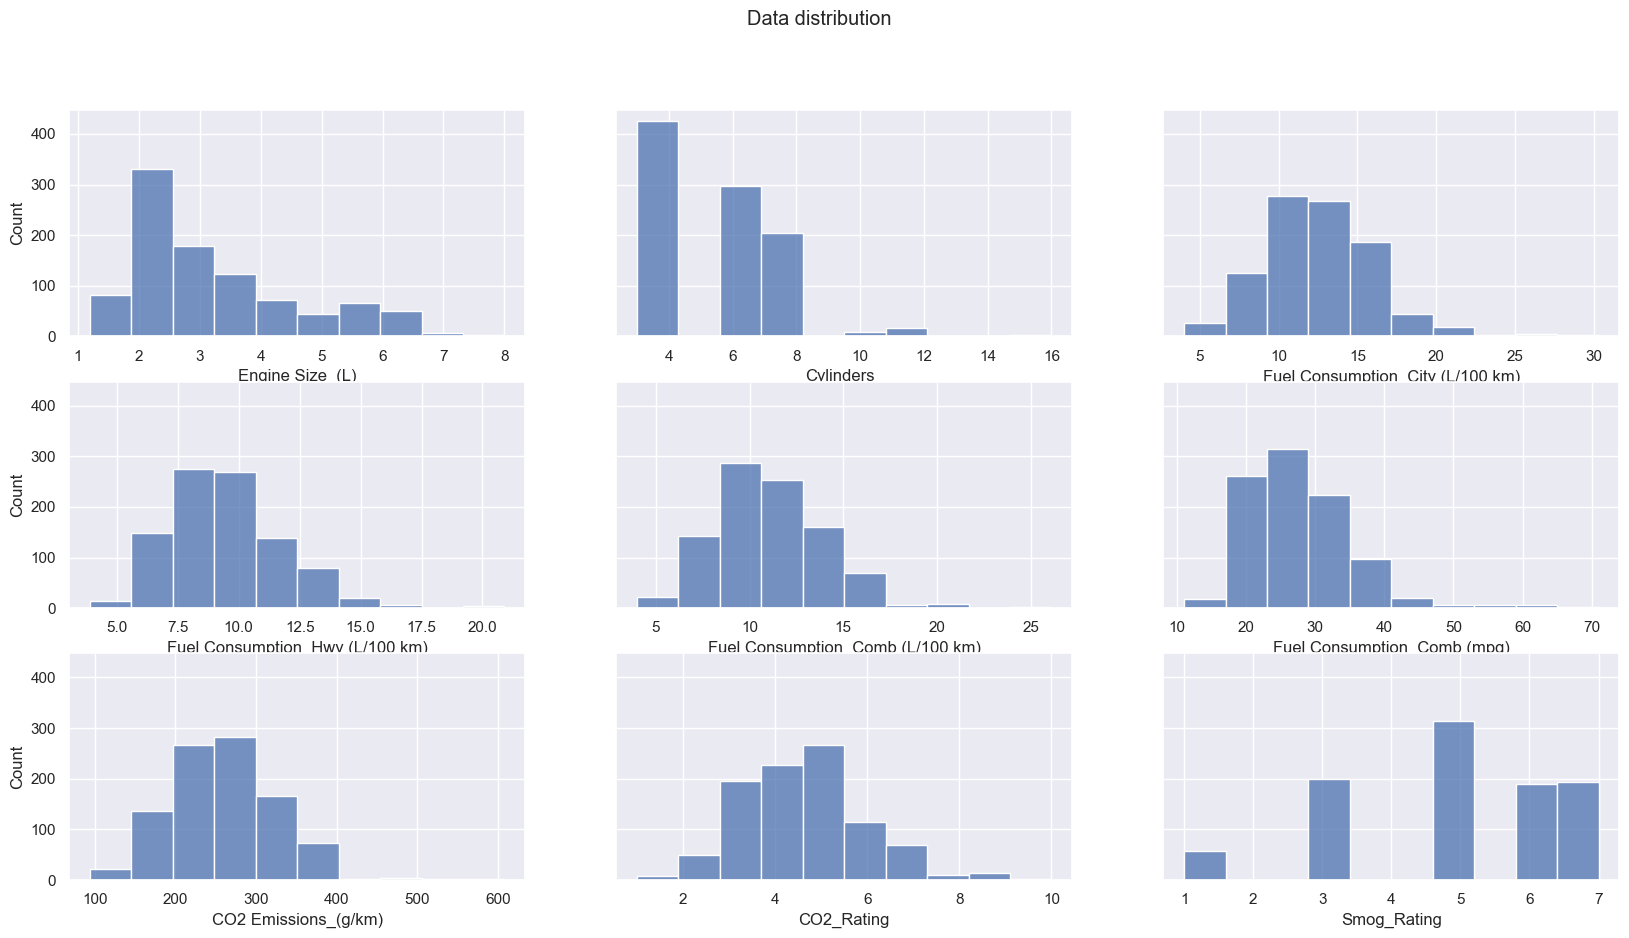

In [51]:
col_list_float = ['Model_Year','Engine Size_(L)','Cylinders_',
                  'Fuel Consumption_City (L/100 km)','Fuel Consumption_Hwy (L/100 km)',	
                  'Fuel Consumption_Comb (L/100 km)','Fuel Consumption_Comb (mpg)',
                  'CO2 Emissions_(g/km)'	,
                  'CO2_Rating',	'Smog_Rating']      


col_list_float.pop(0)    

fig, axes = plt.subplots(3, 3, sharey=True, figsize=(20,10))
fig.suptitle('Data distribution')
k=0
for i in range(0,3):
    for j in range(0,3):

        k+=1
        variable= col_list_float[k-1]
        sns.histplot(ax=axes[i, j], data=co2_consumption, x=variable, bins=10)
plt.show()

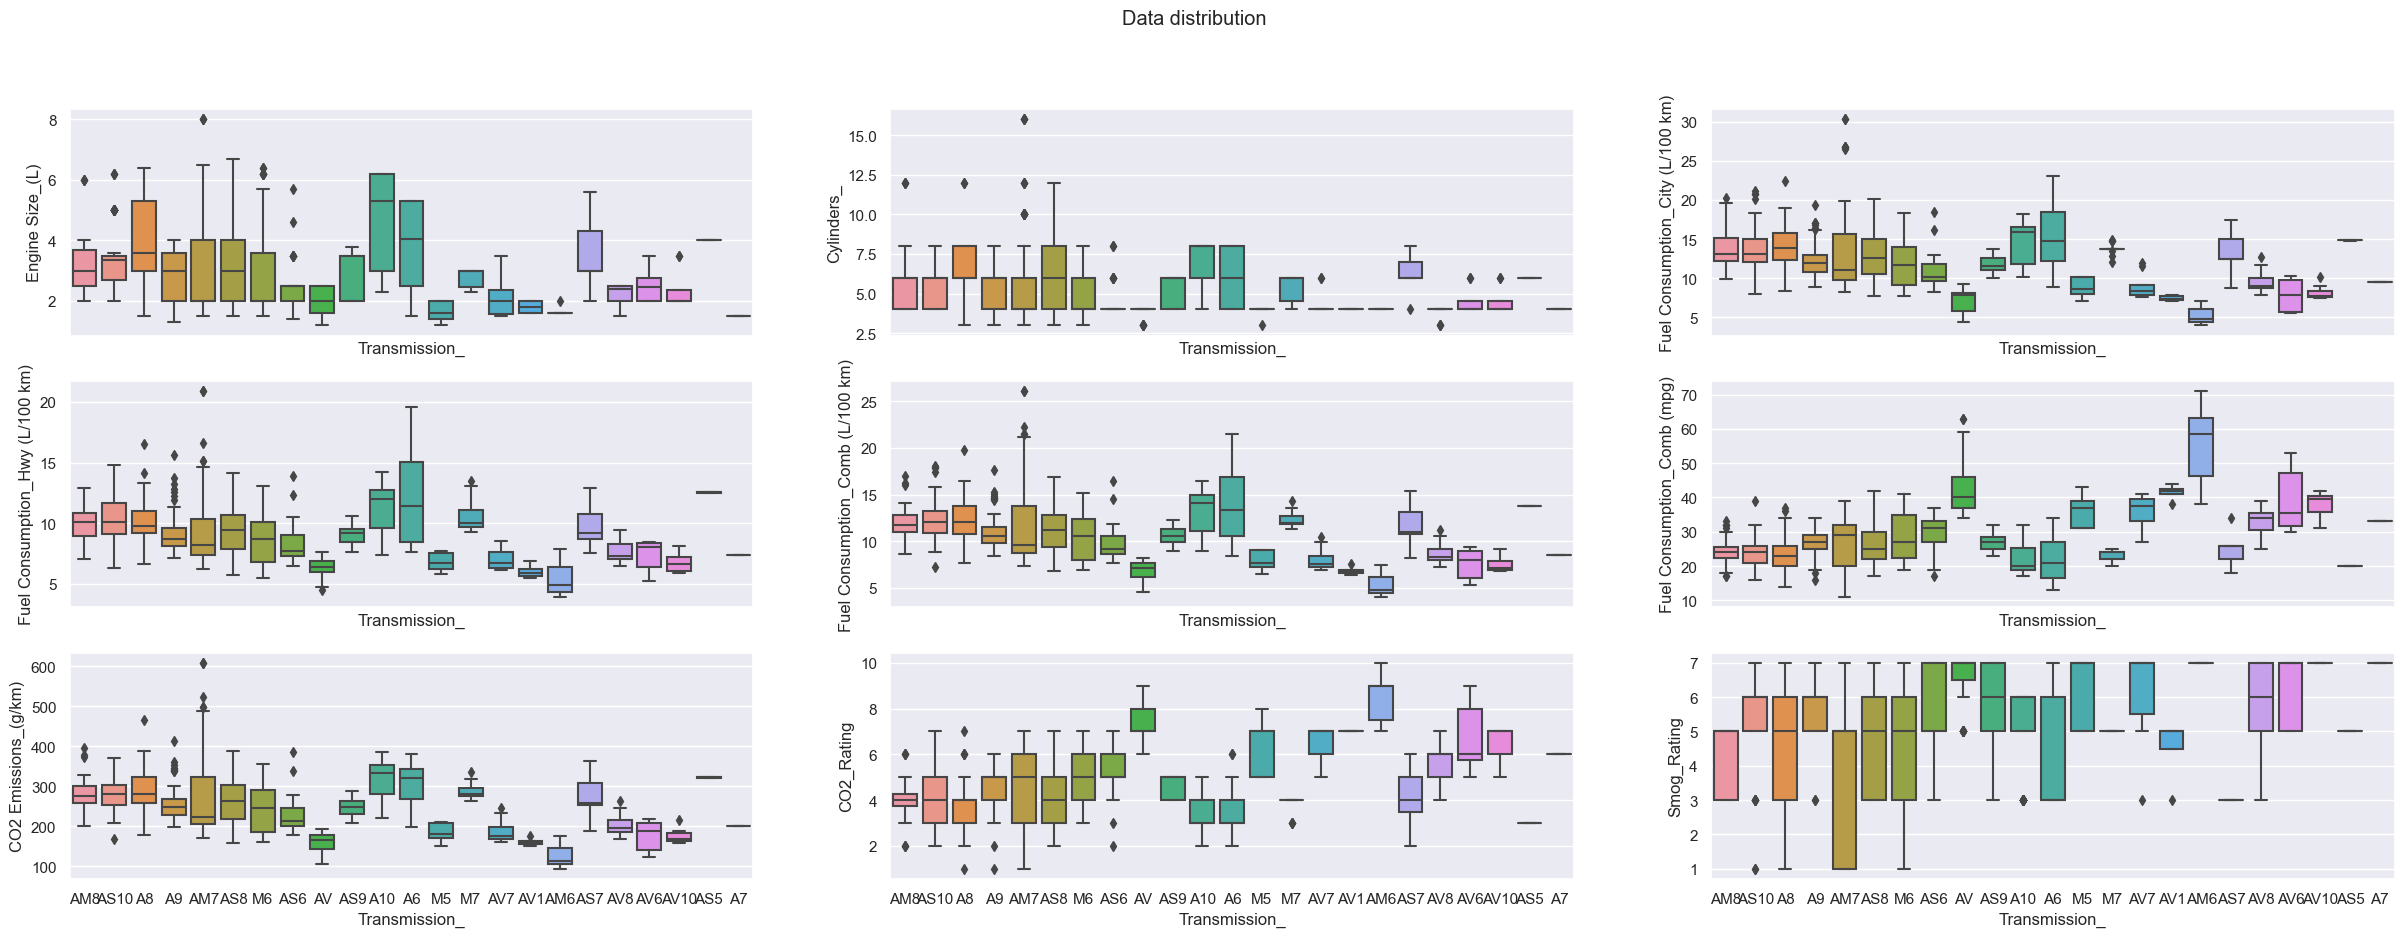

In [52]:
col_list_float = ['Model_Year','Engine Size_(L)','Cylinders_',
                  'Fuel Consumption_City (L/100 km)','Fuel Consumption_Hwy (L/100 km)',	
                  'Fuel Consumption_Comb (L/100 km)','Fuel Consumption_Comb (mpg)',
                  'CO2 Emissions_(g/km)'	,
                  'CO2_Rating',	'Smog_Rating']      

col_list_float.pop(0)    

fig, axes = plt.subplots(3, 3, sharex=True, figsize=(30,10))
fig.suptitle('Data distribution')

k = 0
for i in range(0,3):
    for j in range(0,3):
        k+=1
        variable= col_list_float[k-1]
        sns.boxplot(ax=axes[i, j], data=co2_consumption, y=variable, x="Transmission_")
plt.show()

### Start studying air quality in a chosen city
### Study what cities have what car makes, models etc,
### Mix air quality data set, car distribution by region, and car scoring


1. Dataset on fuel consumption from different car models
2. Dataset on what cars are in what cities (?)
3. Dataset on air quality of a location


#### Recommendation: 

Note that we don't have an objective labels (very tricky to measure good performance)

Instead, try to formulate it as a classification problem (i.e. predict)

To do: come up with a question we can solve using a classification angle. 

Example: what will be the air quality with a given number of cars with a specific model (i.e. think of their co2 emissions and smog ratings)

Notes for classification problem:

1. Need categories (i.e. discretize it)
2. Need targer label (supervised learning)

Alternative, continuous (regression)

1. Focus on variables like prices

-----

While exploring the data, think about what questions or problems can be predicted. Once question is established, then we need to understand whether we have an answer for this (need historical data). Can we obtain or derive this data from the sources we have? If yes, we can then approach this using supervised learning. 

Example, what will be the CO2 emission of a city from a year from now? we need to know this data through historical data first. 

### 2. Dataset 2: Air quality information from OpenAQ

Note: OpenAQ was accessed on October 24 2022 from https://registry.opendatarequestss/openaq.

Data was retrieved using the OpenAQ API. Data can also be retrieved as a CSV file from the OpenAQ dataset using Amazon Athena. Instructions on this step are outlined in the OpenAQ GitHub. Boto3 can also be used to access the S3 bucket (without AWS credentials).


In [62]:
aq_requrl = "https://api.openaq.org/v2/cities?limit=1000&page=1&offset=0&sort=asc&country_id=CA&city=ALBERTA&order_by=city"
# BC https://api.openaq.org/v2/cities?limit=1000&page=1&offset=0&sort=asc&country_id=CA&city=BRITISH%20COLUMBIA&order_by=city
get = requests.get(aq_requrl)

In [72]:
# store the response of URL
response = uReq(aq_requrl)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())

In [73]:
data_json

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0d',
  'website': 'api.openaq.org',
  'page': 1,
  'limit': 1000,
  'found': 1},
 'results': [{'country': 'CA',
   'city': 'ALBERTA',
   'count': 5146788,
   'locations': 42,
   'firstUpdated': '2016-03-06T20:00:00+00:00',
   'lastUpdated': '2022-10-24T21:00:00+00:00',
   'parameters': ['co', 'no2', 'o3', 'pm25', 'so2']}]}

In [102]:
another_url ='https://api.openaq.org/v2/locations?limit=10000&page=1&offset=0&sort=desc&radius=1000&country_id=CA&order_by=lastUpdated&dumpRaw=false'
# store the response of URL
response = uReq(another_url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())


In [103]:
data_json.keys()

dict_keys(['meta', 'results'])

In [87]:
sample_df_openaq = pd.json_normalize(data_json, record_path="results")
sample_df_openaq.head(10)

,id,city,name,entity,country,sources,isMobile,isAnalysis,parameters,sensorType,lastUpdated,firstUpdated,measurements,bounds,manufacturers,coordinates.latitude,coordinates.longitude
0,61952,None,Strathcona Terrace,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 1168124, 'unit': 'particles/cm³', 'cou...",low-cost sensor,2022-10-24T23:00:14+00:00,2021-01-14T02:04:46+00:00,3894534,None,None,50.676712,-120.351395
1,65885,None,Bush Road,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 402944, 'unit': 'µg/m³', 'count': 9259...",low-cost sensor,2022-10-24T23:00:14+00:00,2021-01-19T23:59:45+00:00,5555412,None,None,49.275635,-124.815790
2,71743,None,Lorne Street,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 420517, 'unit': 'µg/m³', 'count': 9607...",low-cost sensor,2022-10-24T23:00:14+00:00,2021-01-13T21:54:19+00:00,5764698,None,None,50.678123,-120.330920
3,350574,None,CHISASIBI FIRE DEPARTMENT,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,None,"[{'id': 1993121, 'unit': 'µg/m³', 'count': 142...",low-cost sensor,2022-10-24T23:00:14+00:00,2022-06-07T17:36:11+00:00,852606,None,None,53.777320,-78.885470
4,233151,None,Violet Hill,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,None,"[{'id': 1341514, 'unit': 'particles/cm³', 'cou...",low-cost sensor,2022-10-24T23:00:13+00:00,2021-08-22T17:58:43+00:00,3262482,None,None,44.099910,-80.090420
5,62393,None,Mount Prevost El,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 1166318, 'unit': 'particles/cm³', 'cou...",low-cost sensor,2022-10-24T23:00:12+00:00,2021-01-13T21:53:21+00:00,5617962,None,None,48.795055,-123.736084
6,63092,None,Lower Sahtlam,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 854592, 'unit': 'particles/cm³', 'coun...",low-cost sensor,2022-10-24T23:00:12+00:00,2021-01-19T23:59:31+00:00,5682024,None,None,48.766350,-123.881390
7,69737,None,AQSU-D363,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 878187, 'unit': 'particles/cm³', 'coun...",low-cost sensor,2022-10-24T23:00:12+00:00,2021-01-19T23:58:28+00:00,4392162,None,None,49.244152,-123.142456
8,71912,None,WCA_Hinton,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,False,"[{'id': 421025, 'unit': 'µg/m³', 'count': 6800...",low-cost sensor,2022-10-24T23:00:12+00:00,2021-01-19T23:58:20+00:00,4080006,None,None,53.426987,-117.543660
9,358359,None,Lynn Valley Centre,community,CA,"[{'url': 'https://www2.purpleair.com/', 'name'...",False,None,"[{'id': 2027955, 'unit': 'particles/cm³', 'cou...",low-cost sensor,2022-10-24T23:00:12+00:00,2022-09-11T19:26:02+00:00,280818,None,None,49.335957,-123.040940


### Maybe useful

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310006701&pickMembers%5B0%5D=1.2&cubeTimeFrame.startYear=2015&cubeTimeFrame.endYear=2019&referencePeriods=20150101%2C20190101

Reading 

https://www.nrcan.gc.ca/energy-efficiency/buildings/nrcans-greening-government-services/federal-vehicles-fleets/20053


New motor vehicle registrations, quarterly 
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002401

New motor vehicle registrations, yearly
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002101

New zero-emission vehicle registrations, quarterly
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002501

New vehicle sales
https://open.canada.ca/data/en/dataset/0decc62b-3047-417c-81e7-d8f96fac09a9


Sales of gasoline used for road motor vehicles, monthly, inactive
https://open.canada.ca/data/en/dataset/e75562a3-3dea-471b-b143-a8b918a49a2c


International Organization of Motor Vehicle Manufacturers
OICA is the voice speaking on automotive issues in world forums
https://www.oica.net/category/production-statistics/1999-statistics/


Cars sold world

https://www.factorywarrantylist.com/car-sales-by-country.html

https://carsalesbase.com/algeria-car-sales-data/


https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=4510001403


# To scrape cars sold in Canada and US by make

https://www.goodcarbadcar.net/volvo-xc60-sales-figures/


To do: write a Scrapy script that extracts data on cars

In [105]:
co2_consumption['Vehicle Class_'].unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

# tip - use url structure 
https://www.goodcarbadcar.net/acura-ilx-sales-figures-canada/
    
https://www.goodcarbadcar.net/acura-ilx-sales-figures/
    
https://www.goodcarbadcar.net/tag/acura-ilx/
    
# volvo    
https://www.goodcarbadcar.net/volvo-xc40-sales-figures-canada/